# The First Competition Of ML

In [23]:
# The first competition in machine learning, and God willing, it will be a good opening in this very exciting field
# Sara Jehad Ali Alsanajleh :)
# Department : Computer Science

# Define Libraries

In [24]:
# Pandas : a library for data manipulation and analysis.
# Numpy : a fundamental library for numerical computing in Python.
# Matplotlib and Seaborn : Libraries for data visualization.
# Scikit-Learn : a library for machine learning. 

In [25]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import confusion_matrix 

import warnings
warnings.filterwarnings("ignore") 

# Define Data

In [26]:
# Here I just put the paths where the data is stored and read them through Function (pd.read_csv)

In [27]:
path = "C:\\Users\\sara alsanajleh\\Desktop\\Competition ML\\spambase_train.csv"
tr = pd.read_csv(path , sep=',')

In [28]:
p ="C:\\Users\\sara alsanajleh\\Desktop\\Competition ML\\spambase_test.csv"
tst= pd.read_csv(p , sep=',')

# Explore Data

In [29]:
tr.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


In [30]:
tr.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
3215,0.0,0.00,4.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.000,0.0,0.613,0.0,0.000,1.000,1,14,0,1105
3216,0.0,0.00,0.00,0.0,4.16,0.00,0.00,0.0,0.0,0.00,...,0.689,0.0,0.689,0.0,0.000,1.300,4,13,0,4440
3217,0.0,0.00,0.00,0.0,1.11,0.00,0.00,0.0,0.0,0.00,...,0.000,0.0,0.784,0.0,0.000,5.687,39,91,1,51
3218,0.0,0.57,0.57,0.0,1.14,0.57,2.28,0.0,0.0,0.57,...,0.081,0.0,0.487,0.0,0.081,16.217,147,373,1,2189
3219,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.484,0.0,0.484,0.0,0.000,2.500,15,65,0,38


In [31]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [32]:
tr.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.107565,0.219578,0.275407,0.058829,0.314683,0.097298,0.118898,0.099686,0.091453,0.229345,...,0.143251,0.017520,0.270860,0.077458,0.041834,5.457483,52.505280,274.024534,0.394099,2278.129503
std,0.314254,1.327783,0.503584,1.259640,0.651033,0.284463,0.409209,0.346193,0.287124,0.554067,...,0.298311,0.122903,0.878821,0.266767,0.460444,35.093870,216.894496,587.004441,0.488732,1334.489903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.583000,6.000000,34.000000,0.000000,1124.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.064000,0.000000,0.000000,0.000000,0.000000,2.276500,15.000000,93.000000,0.000000,2253.500000
75%,0.000000,0.000000,0.410000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.190250,0.000000,0.319250,0.051000,0.000000,3.706250,43.000000,261.000000,1.000000,3433.250000
max,4.540000,14.280000,5.100000,42.810000,9.090000,5.880000,7.270000,4.680000,5.260000,7.550000,...,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000,4600.000000


In [33]:
tr.duplicated().sum()

0

In [34]:
tr.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [35]:
# after exploring the data, I noticed that: 
# 1) i have 59 columns
# 2) I have a mix of categorical and numerical features.
# 3) i dont have null values in my dataset.
# 4) I don't have duplicate values.
# 5) The data type for most columns is float, and there is also an integer.
# 6) memory usage is : 1.4 MB

# Analysis Data

In [36]:
tr.spam.value_counts() # here just i want to know the number of spam and not spam .

spam
0    1951
1    1269
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

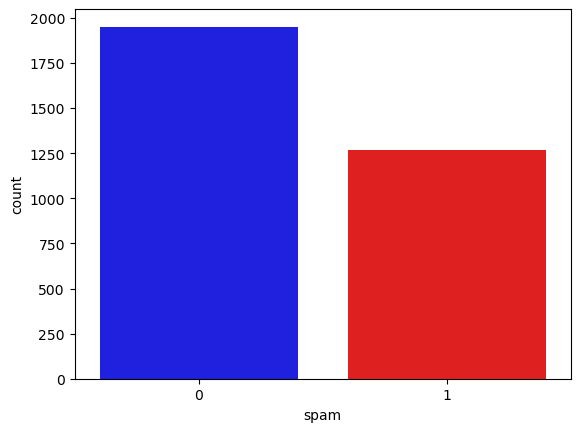

In [37]:
sns.countplot(x='spam' ,data=tr, palette=['blue','red'])# after seeing the plot,it became clear that the data is imbalance 

In [38]:
# To identify relationships between variables and spot trends and patterns within large datasets <<<
# >>> and  Detecting Outliers i will make the heat map by taking  a sample of features because i have 59 features  :)
df = pd.DataFrame(np.random.rand(100, 17),columns=[
    'word_freq_address', 'word_freq_all', 'word_freq_internet', 'word_freq_receive', 'word_freq_people',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_font', 'word_freq_money', 
    'word_freq_hp', 'word_freq_george', 'word_freq_data', 'word_freq_direct', 'word_freq_meeting', 
    'word_freq_project', 'word_freq_edu'
])
d= df.corr()

<Axes: >

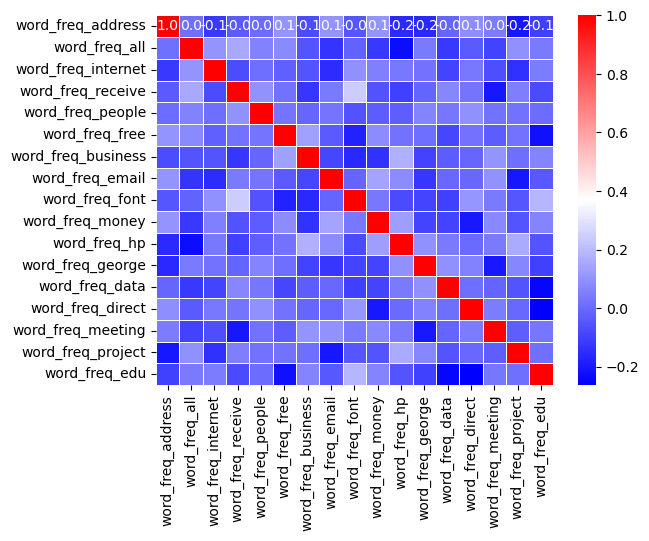

In [39]:
sns.heatmap(d, annot=True, cmap='bwr', fmt='.1f', linewidths=.5)

# Create Model

In [40]:
# Splitting Features (x1,x2....xn)  and Target Variable(y : spam)
X = tr.drop(columns=['spam', 'ID'])
y = tr['spam']

In [41]:
# Exactly identify the parts of training and testing 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
# Scaling the training and validation data to have zero mean and unit variance
# the above functions indicates that there is no missing Value, but to be completely sure I used imputer
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
Xtrimp = imputer.fit_transform(X_train)
Xtrsc = scaler.fit_transform(Xtrimp)
Xvalimp = imputer.transform(X_val)
Xvalsc = scaler.transform(Xvalimp)

# dropping the ID column from the test set as it is not a feature used for modeling
# the 'ID' column does not contain any information relevant to the predictive modeling task. 
# including it in the model training would add noise and could negatively impact the performance of the model.
X_test = tst.drop(columns=['ID'])
Xtstimp = imputer.transform(X_test)
Xtstsc = scaler.transform(Xtstimp)


In [43]:
# define model and fitting it 
model = RandomForestClassifier(random_state=42)
model.fit(Xtrsc, y_train)

# getting feature importances from the trained model
imp_fe = model.feature_importances_

# Selecting the top 30 features based on their importance
top_fe = imp_fe.argsort()[-30:][::-1]  # Indices of top 30 features
topxtr = Xtrsc[:, top_fe]  # Training data with top 30 features
topxval = Xvalsc[:, top_fe]  # Validation data with top 30 features
topxtst = Xtstsc[:, top_fe]  # Test data with top 30 features

In [44]:
# defining the hyperparameter grid for GridSearchCV
param = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}


In [45]:
# here im using  StratifiedKFold as a cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gs = GridSearchCV(estimator=model, param_grid=param, cv=cv, n_jobs=-1, verbose=2, scoring='f1')

# fitting the GridSearch CV to the training data
gs.fit(topxtr, y_train)

# print the best parameter from the result of grid search
best_par = gs.best_params_
print("Best Parameters:", best_par)

# getting the best model from the GridSearch CV
bst = gs.best_estimator_

# predicting on the validation data using the best model then i calculate f1 score and print it
ypre = bst.predict(topxval)
f1_best = f1_score(y_val, ypre)
print(f"Best F1 Score: {f1_best}")

# her e the predict on the test data using the best model
test_ids = tst['ID']
tstpre = bst.predict(topxtst)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
Best F1 Score: 0.9606299212598425


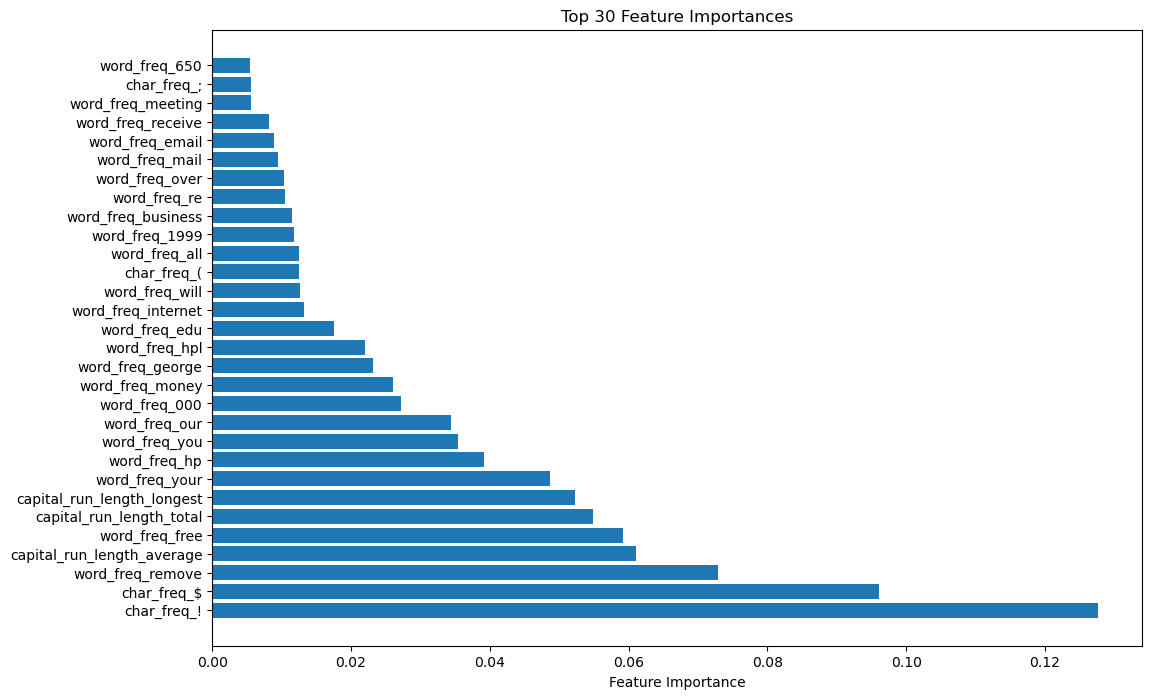

In [46]:
# Plot to show the  feature importances
plt.figure(figsize=(12, 8))
sorted_idx = imp_fe.argsort()[-30:][::-1]
plt.barh(range(len(sorted_idx)), imp_fe[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 30 Feature Importances')
plt.show()

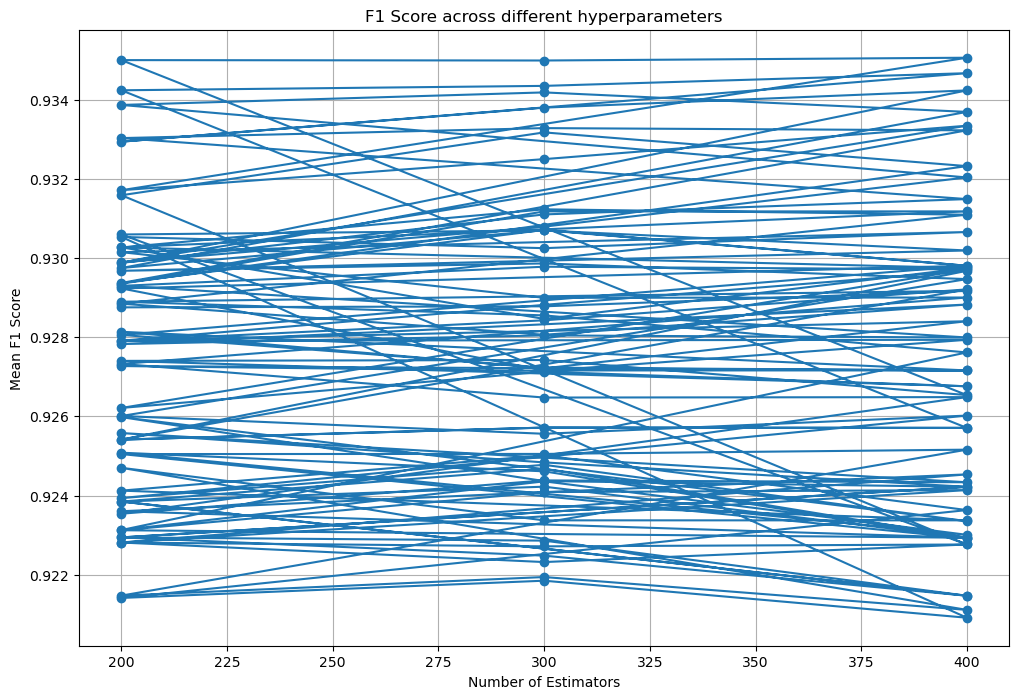

In [47]:
# Plot to show model performance
results = pd.DataFrame(gs.cv_results_)
mean_test_scores = results['mean_test_score']
params = results['param_n_estimators']
plt.figure(figsize=(12, 8))
plt.plot(params, mean_test_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.title('F1 Score across different hyperparameters')
plt.grid(True)
plt.show()

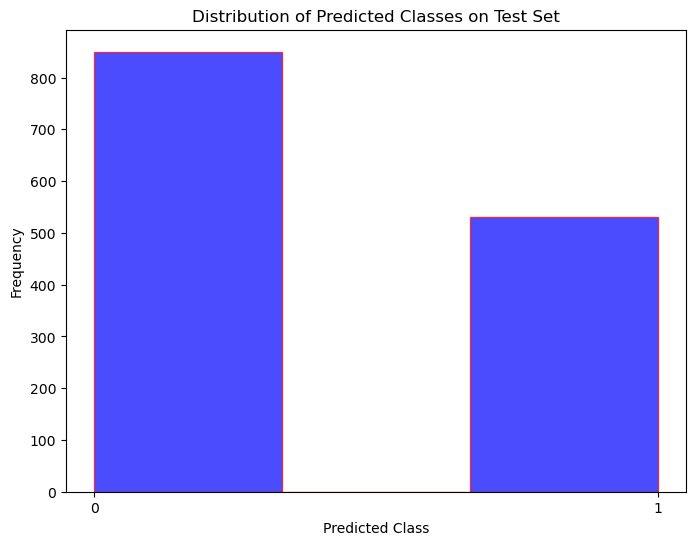

In [66]:
# plot to show Prediction Distribution on Test Set
plt.figure(figsize=(8, 6))
plt.hist(tstpre, bins=3, alpha=0.7, color='blue', edgecolor='red')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Classes on Test Set')
plt.xticks([0, 1])
plt.show()

In [50]:
sub = pd.DataFrame({'ID': test_ids, 'spam': tstpre})
sub

,ID,spam
0,1981,0
1,1940,0
2,4260,1
3,3200,1
4,3082,1
...,...,...
1376,2757,1
1377,1986,0
1378,2972,0
1379,3568,1


In [52]:
sub.to_csv('sarasanajleh.csv', index=False)

# Finally